# Get the data from :
https://www.kaggle.com/datasets/farjanakabirsamanta/skin-cancer-dataset

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.10.0'

In [49]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

# Matching the images to the csv file

In [50]:
metadata = pd.read_csv("/kaggle/input/skin-cancer-dataset/HAM10000_metadata.csv")

In [51]:
metadata.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [52]:
metadata['filename']= metadata['image_id'] + '.jpg'

# Importing the data to Tensorflow

In [53]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,filename
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,ISIC_0032854.jpg


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_df, test_df = train_test_split(metadata, test_size=0.1)

In [56]:
train_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,filename
7115,HAM_0006268,ISIC_0026432,nv,histo,50.0,female,lower extremity,ISIC_0026432.jpg
9656,HAM_0002408,ISIC_0031454,nv,consensus,65.0,male,neck,ISIC_0031454.jpg
5389,HAM_0004137,ISIC_0024966,nv,follow_up,45.0,female,abdomen,ISIC_0024966.jpg
1463,HAM_0006435,ISIC_0034071,mel,histo,50.0,male,back,ISIC_0034071.jpg
8004,HAM_0003033,ISIC_0025970,nv,histo,60.0,female,lower extremity,ISIC_0025970.jpg
...,...,...,...,...,...,...,...,...
5141,HAM_0002958,ISIC_0026088,nv,follow_up,45.0,male,neck,ISIC_0026088.jpg
2961,HAM_0005488,ISIC_0024931,bcc,histo,85.0,male,upper extremity,ISIC_0024931.jpg
7364,HAM_0002244,ISIC_0032549,nv,histo,25.0,female,chest,ISIC_0032549.jpg
9644,HAM_0007069,ISIC_0031209,nv,consensus,50.0,female,lower extremity,ISIC_0031209.jpg


In [57]:
test_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,filename
5715,HAM_0002406,ISIC_0030568,nv,follow_up,50.0,female,upper extremity,ISIC_0030568.jpg
1136,HAM_0004371,ISIC_0027626,df,histo,45.0,female,upper extremity,ISIC_0027626.jpg
1021,HAM_0003973,ISIC_0026867,bkl,consensus,55.0,male,trunk,ISIC_0026867.jpg
7019,HAM_0006605,ISIC_0026055,nv,histo,50.0,female,neck,ISIC_0026055.jpg
6303,HAM_0004611,ISIC_0027716,nv,follow_up,50.0,male,trunk,ISIC_0027716.jpg
...,...,...,...,...,...,...,...,...
98,HAM_0003007,ISIC_0028080,bkl,histo,40.0,female,abdomen,ISIC_0028080.jpg
7198,HAM_0005116,ISIC_0032953,nv,histo,5.0,female,lower extremity,ISIC_0032953.jpg
9615,HAM_0003696,ISIC_0032945,nv,consensus,NaN,unknown,unknown,ISIC_0032945.jpg
7865,HAM_0004118,ISIC_0032593,nv,histo,30.0,female,trunk,ISIC_0032593.jpg


In [58]:
dir_path = '/kaggle/input/skin-cancer-dataset/Skin Cancer/Skin Cancer/'

In [59]:
# Create generators
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, validation_split=0.1)

In [60]:
batch_size = 32
target_size = (224, 224)

In [61]:
# Flow image data
train_images = data_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=dir_path,
    x_col='filename',
    y_col='dx',
    subset='training',
    shuffle=True,
    class_mode='categorical',
    target_size=target_size,
)

val_images = data_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=dir_path,
    x_col='filename',
    y_col='dx',
    subset='validation',
    shuffle=True,
    class_mode='categorical',
    target_size=target_size,
)

test_images = data_generator.flow_from_dataframe(
    dataframe=test_df,
    directory=dir_path,
    x_col='filename',
    y_col='dx',
    class_mode='categorical',
    target_size=target_size,
)

Found 8112 validated image filenames belonging to 7 classes.
Found 901 validated image filenames belonging to 7 classes.
Found 1002 validated image filenames belonging to 7 classes.


In [62]:
class_names = list(train_images.class_indices.keys())
class_names

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [63]:
train_images.next()[0].shape, train_images.next()[1].shape

((32, 224, 224, 3), (32, 7))

In [64]:
train_images.image_shape

(224, 224, 3)

### Function to plot some images

In [65]:
def plot_images(train_images):
    rows = 2
    cols = 4
    samples, labels = train_images[0]

    plt.figure(figsize=(3.5 * cols, 3.5 * rows))
    for i in range(rows * cols):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(samples[i], cmap='gray')
        plt.title(f'Tumor : {class_names[int(labels[i][1])]}')
        #plt.axis('off')
    plt.show()

# Now the CNN

In [66]:
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, Input
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import ResNet50V2

In [67]:
base_model = ResNet50V2(include_top=False, weights='imagenet')

In [68]:
for layer in base_model.layers:
    layer.trainable = False

In [69]:
model = Sequential([
    Input(train_images.image_shape),
    base_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(units=7, activation='softmax')
])
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 14343     
Total params: 23,579,143
Trainable params: 14,343
Non-trainable params: 23,564,800
_________________________________________________________________


In [72]:
train = model.fit(train_images, batch_size=batch_size, epochs=5, validation_data=val_images)

Epoch 1/5
254/254 [==============================] - 118s 454ms/step - loss: 0.8990 - accuracy: 0.6951 - val_loss: 0.7912 - val_accuracy: 0.7081
Epoch 2/5
254/254 [==============================] - 115s 452ms/step - loss: 0.6819 - accuracy: 0.7495 - val_loss: 0.7129 - val_accuracy: 0.7603
Epoch 3/5
254/254 [==============================] - 113s 447ms/step - loss: 0.6179 - accuracy: 0.7750 - val_loss: 0.6845 - val_accuracy: 0.7658
Epoch 4/5
254/254 [==============================] - 114s 449ms/step - loss: 0.5763 - accuracy: 0.7869 - val_loss: 0.6641 - val_accuracy: 0.7725
Epoch 5/5
254/254 [==============================] - 123s 483ms/step - loss: 0.5349 - accuracy: 0.8026 - val_loss: 0.6650 - val_accuracy: 0.7736


In [73]:
result = model.evaluate(test_images)

32/32 [==============================] - 14s 418ms/step - loss: 0.6359 - accuracy: 0.7715


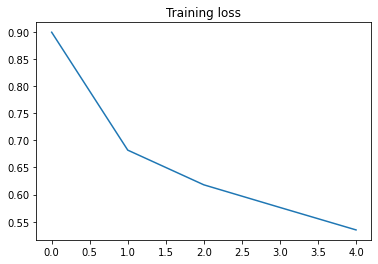

In [74]:
plt.plot(train.history['loss'])
plt.title("Training loss")
plt.show()